In [37]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np

help(make_blobs)


Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

# KNN

In [2]:
X, y = make_blobs(n_samples=1500, centers=4, n_features=2, cluster_std=1, random_state=345)


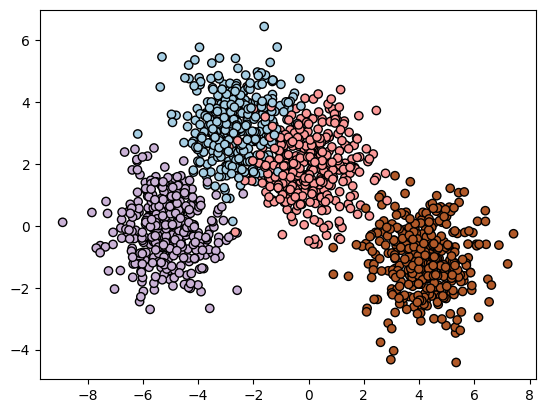

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=83)


In [5]:
kmeans = KMeans(n_clusters=4, random_state=564, n_init="auto").fit(X_train)
pred = kmeans.predict(X_test)

In [6]:
print(kmeans.inertia_)

1913.5683790626679


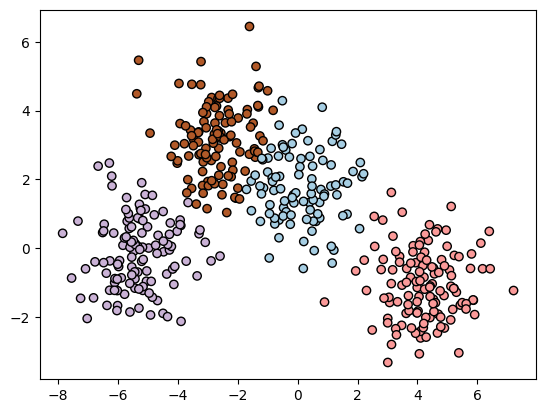

In [7]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred, edgecolors='k', cmap=plt.cm.Paired)


In [8]:
X, y = make_blobs(n_samples=1500, centers=5, n_features=2,
                  cluster_std=1, random_state=345)


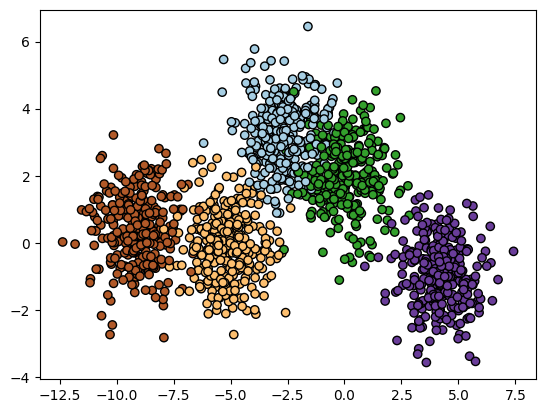

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=83)


In [11]:
kmeans = KMeans(n_clusters=5, random_state=564, n_init="auto").fit(X_train)
pred = kmeans.predict(X_test)


In [12]:
print(kmeans.inertia_)

1925.6026626680832


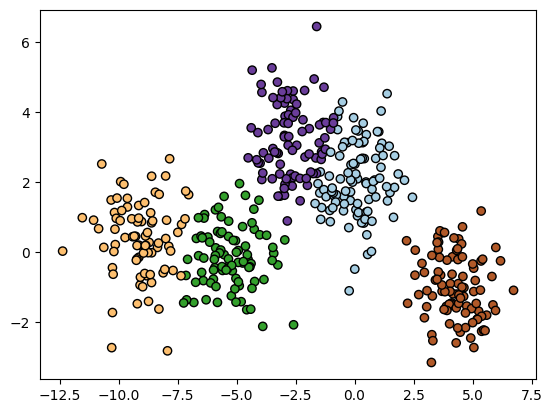

In [13]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred,
            edgecolors='k', cmap=plt.cm.Paired)


In [14]:
kmeans = KMeans(n_clusters=2, random_state=564, n_init="auto").fit(X_train)
pred = kmeans.predict(X_test)


In [15]:
print(kmeans.inertia_)

10178.99129109284


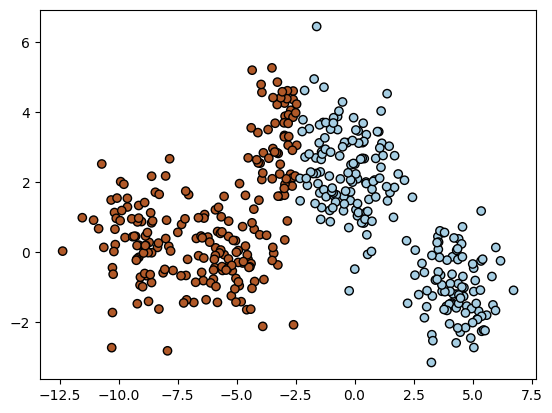

In [16]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred,
            edgecolors='k', cmap=plt.cm.Paired)


# Init=random

In [17]:
kmeans = KMeans(n_clusters=5, random_state=564, n_init="auto", init="random").fit(X_train)
pred = kmeans.predict(X_test)


In [18]:
print(kmeans.inertia_)

1925.6026626680832


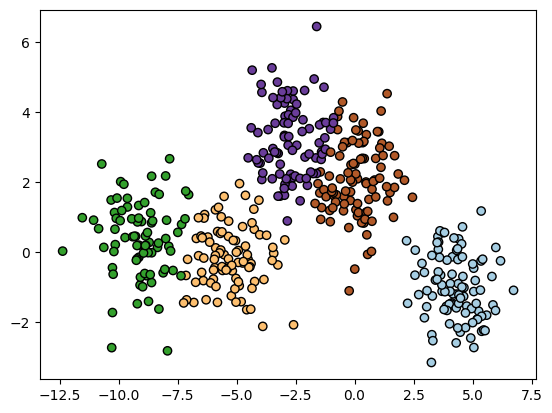

In [19]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred,
            edgecolors='k', cmap=plt.cm.Paired)


# Elbow

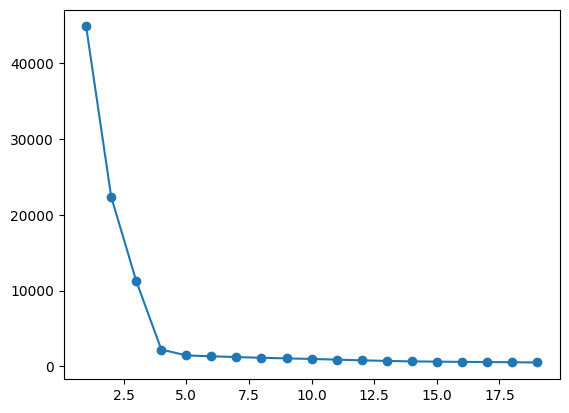

In [20]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=1, random_state=734)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=83)

inertia_values = [KMeans(n_clusters=i, random_state=564, n_init="auto").fit(
    X_train, y_train).inertia_ for i in range(1, 20)]
plt.plot(range(1, 20), inertia_values, marker='o')


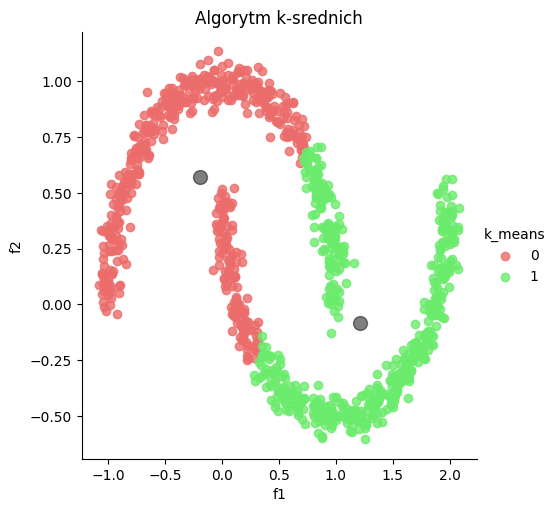

In [21]:
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd

x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns=['f1', 'f2'])
# TODO: Kmeans

kmeans = KMeans(n_clusters=2, random_state=564, n_init="auto").fit(
    x, y)

y_km = kmeans.predict(x)
centers = kmeans.cluster_centers_

# Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue='k_means',
           palette=['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()


# Hierarchical methods

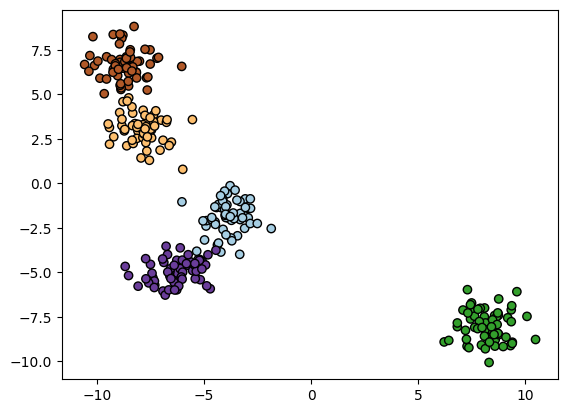

In [27]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=564)
plt.scatter(X[:,0],X[:,1], c = y_true, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

In [28]:
kmeans = KMeans(2, init='random', random_state=564)
kmeans.fit(X)

f:\Michal\Dokumenty\Studia\machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=2, random_state=564)

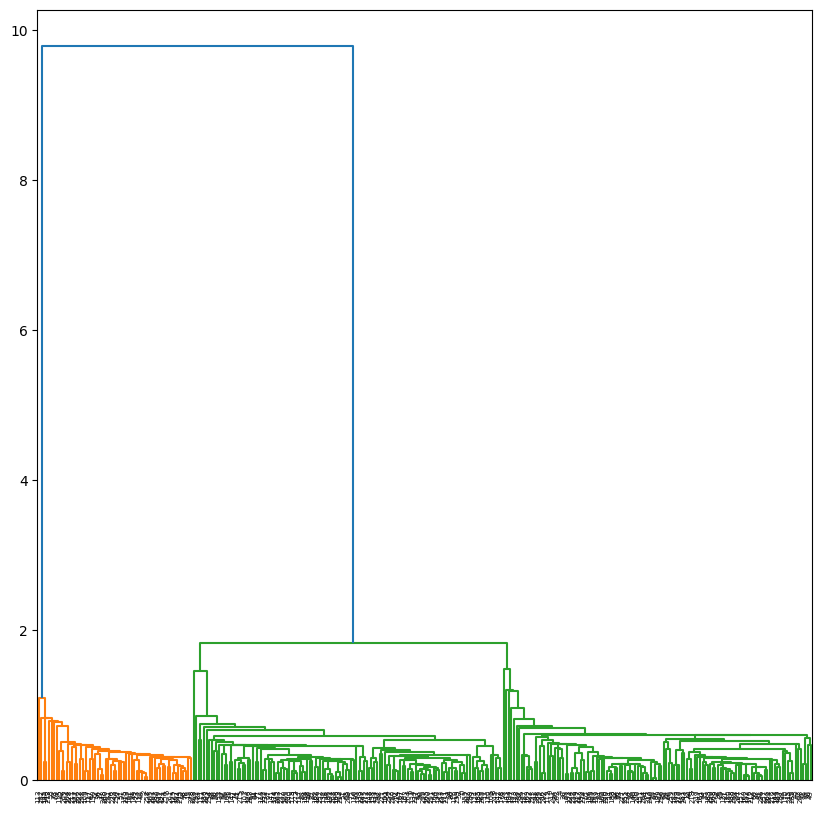

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X)
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)
plt.show()


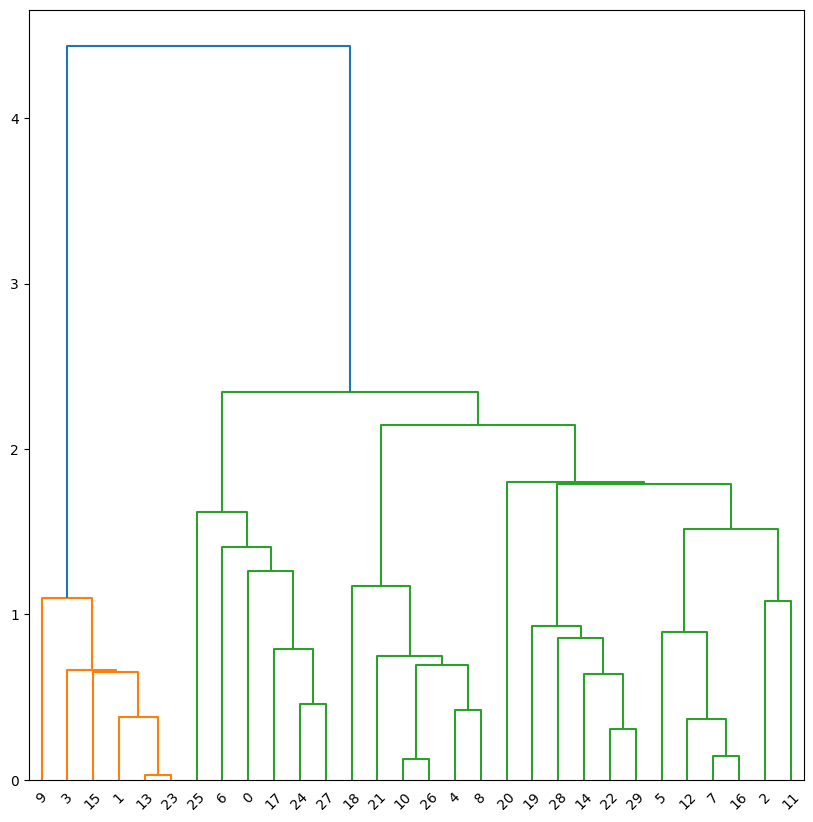

In [30]:
X, y_true = make_blobs(n_samples=30, centers=5,
                       cluster_std=0.8, random_state=0)
Z = linkage(X)
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)
plt.show()

In [31]:
df = pd.read_csv("shopping_data.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
df = df[["Annual Income (k$)", "Spending Score (1-100)"]]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


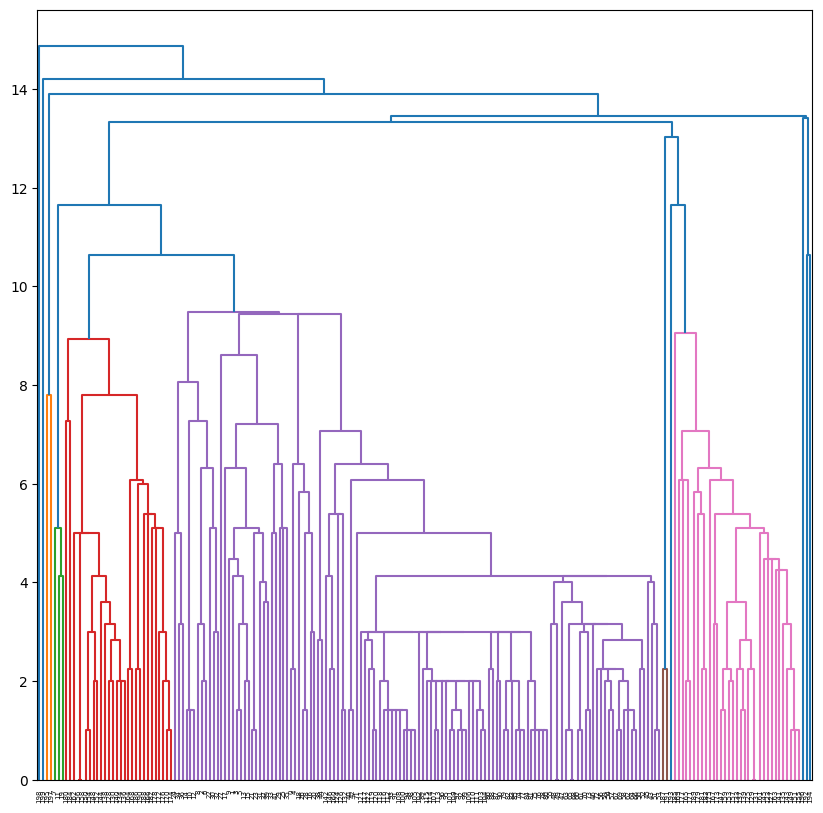

In [33]:
Z = linkage(df)
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)
plt.show()

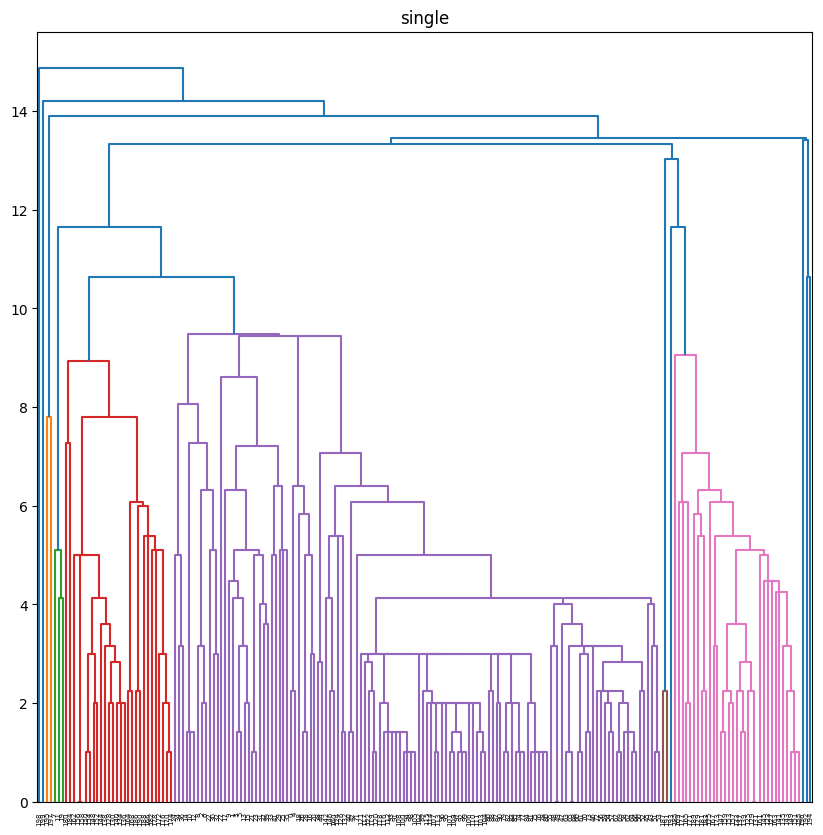

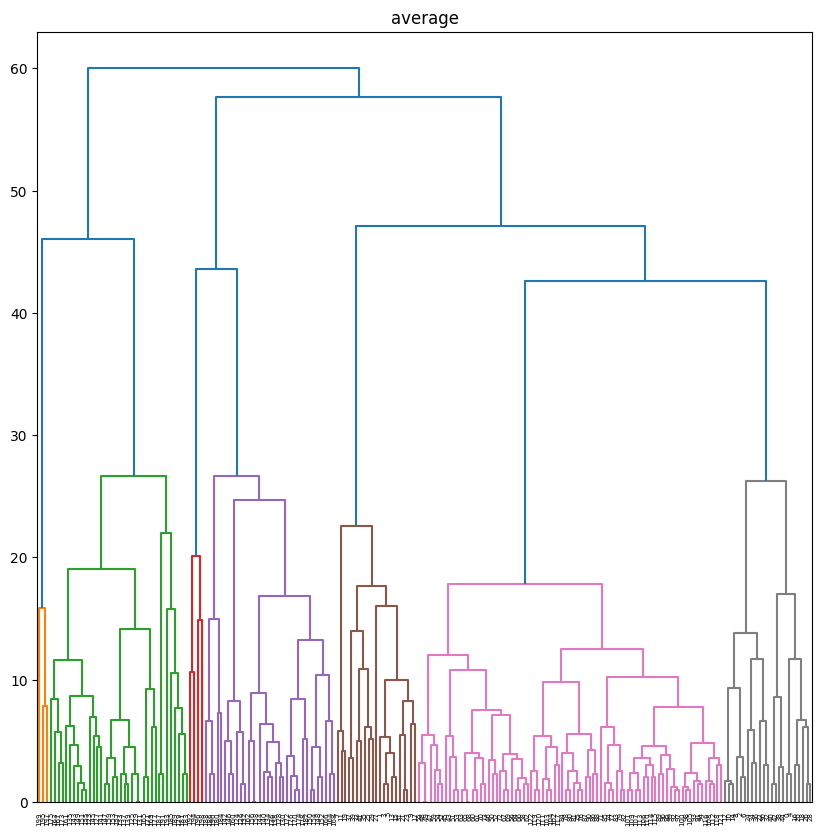

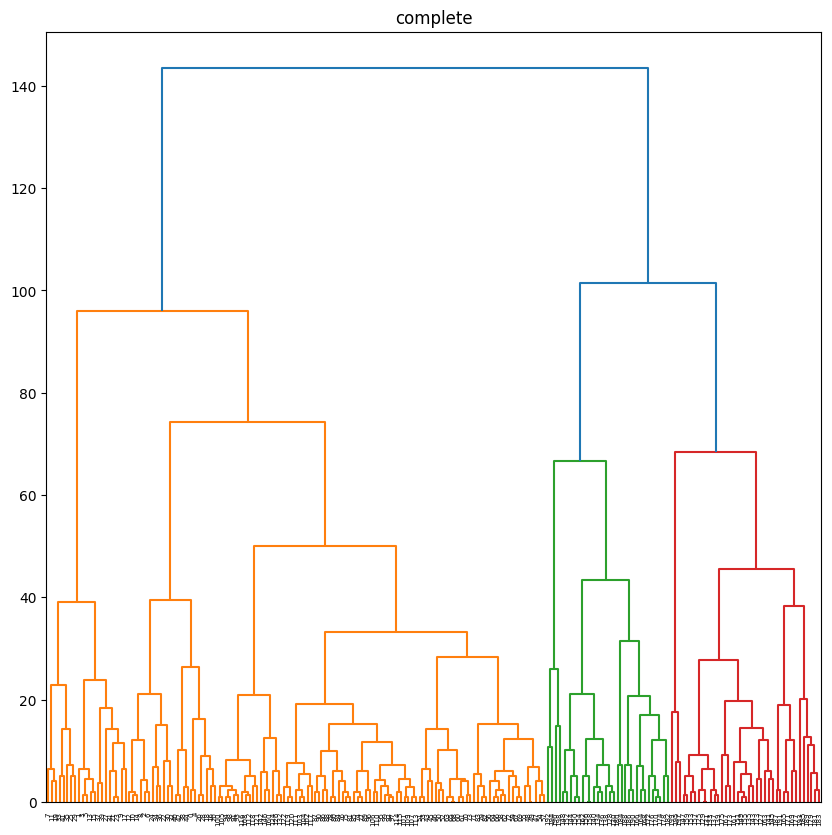

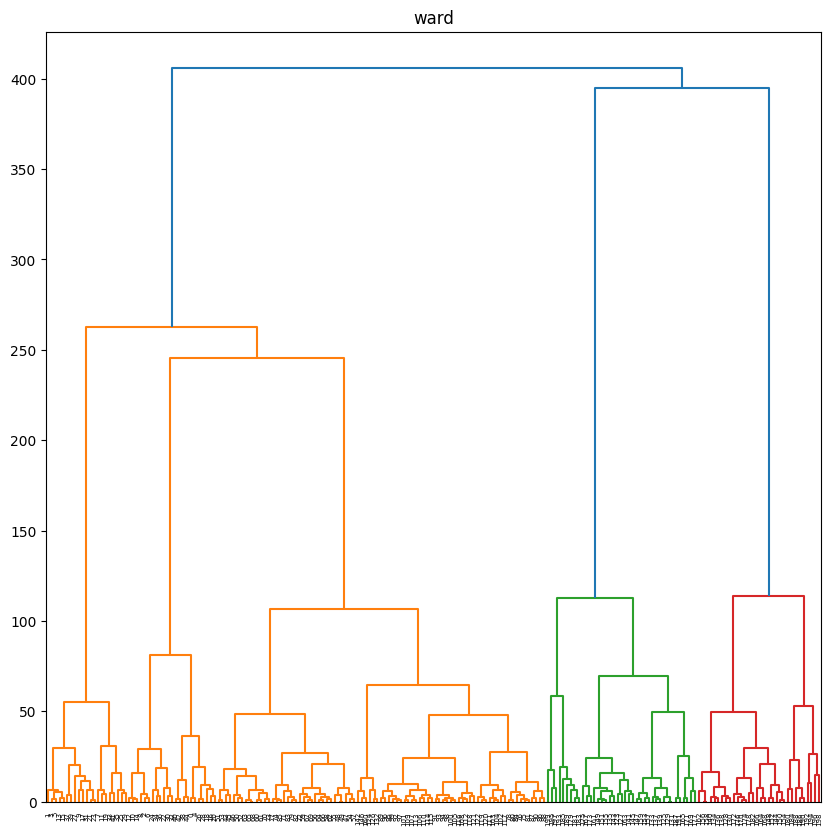

In [35]:
for link_type in ['single', 'average', 'complete', 'ward']:
    Z = linkage(df, link_type)
    fig = plt.figure(figsize=(10, 10))
    dn = dendrogram(Z)
    plt.title(link_type)
    plt.show()

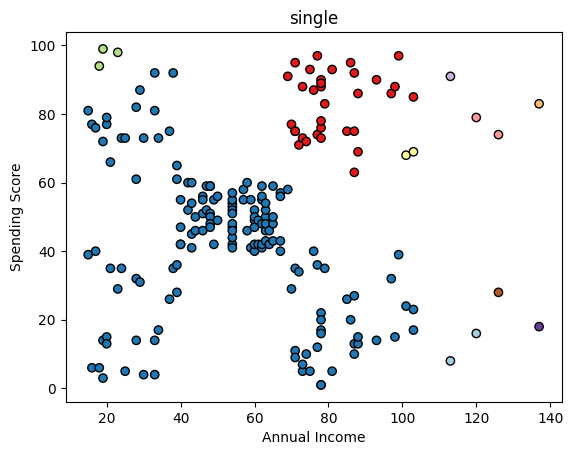

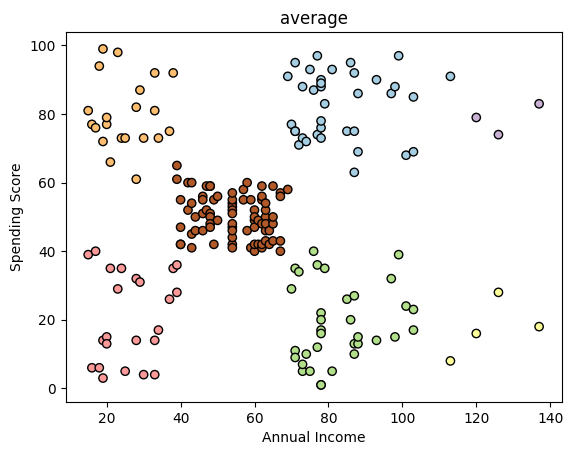

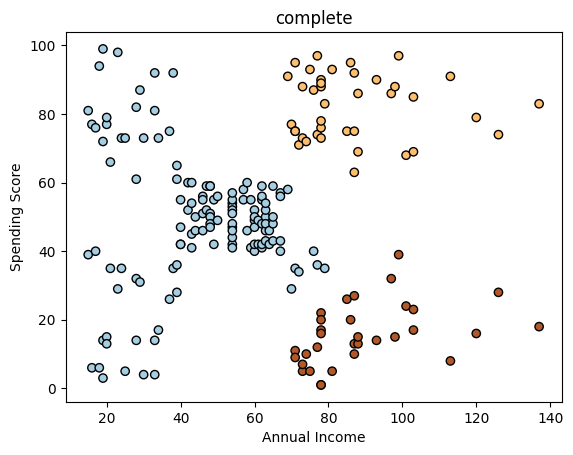

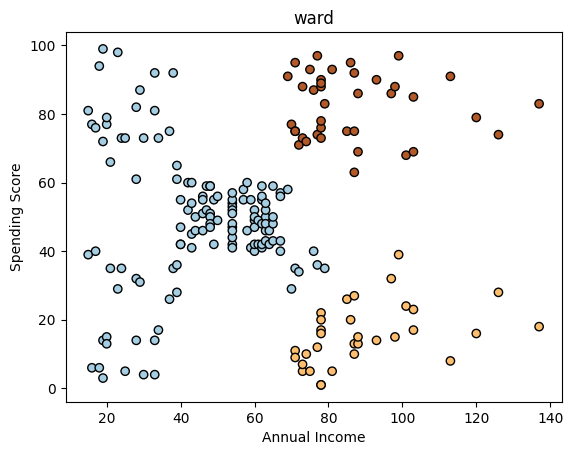

In [36]:
from sklearn.cluster import AgglomerativeClustering
clusterNum = [10,7,3,3]

for n, link in enumerate(['single', 'average', 'complete', 'ward']):
    AggClust = AgglomerativeClustering(n_clusters=clusterNum[n], linkage = link)
    AggClust.fit(df)
    y_pred = AggClust.fit_predict(df)
    
    plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c = y_pred, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.title(link)
    plt.show()

k = 2 : 0.6054224851254122


f:\Michal\Dokumenty\Studia\machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


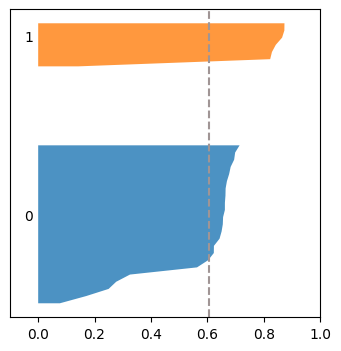

f:\Michal\Dokumenty\Studia\machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 3 : 0.5121331013553261


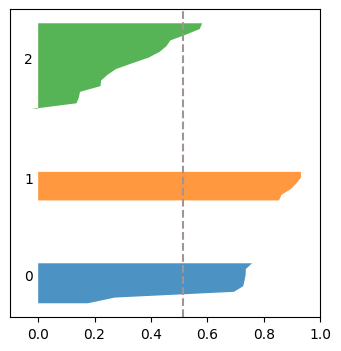

f:\Michal\Dokumenty\Studia\machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 4 : 0.5971822937028547


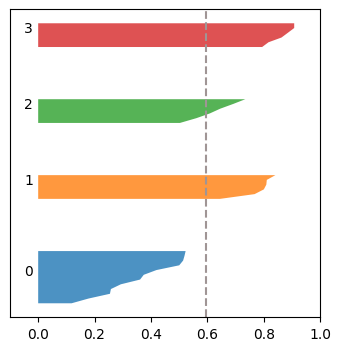

f:\Michal\Dokumenty\Studia\machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 5 : 0.6643631643738349


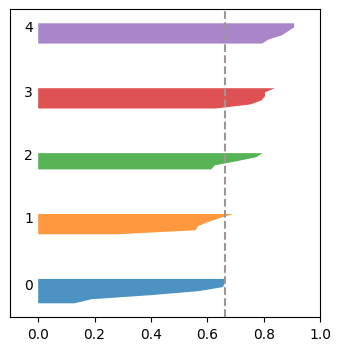

f:\Michal\Dokumenty\Studia\machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 6 : 0.6429560001518564


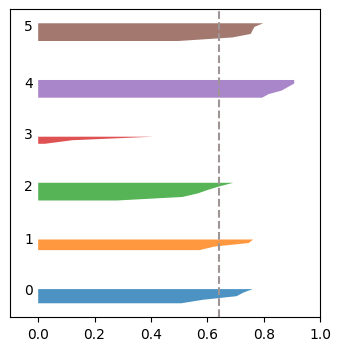

f:\Michal\Dokumenty\Studia\machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 7 : 0.6343781126489074


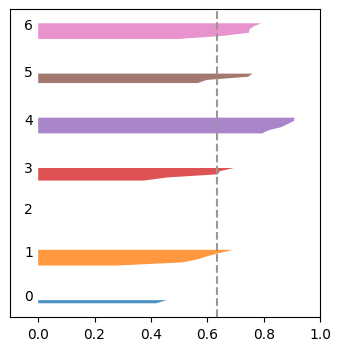

f:\Michal\Dokumenty\Studia\machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 8 : 0.5491588698344654


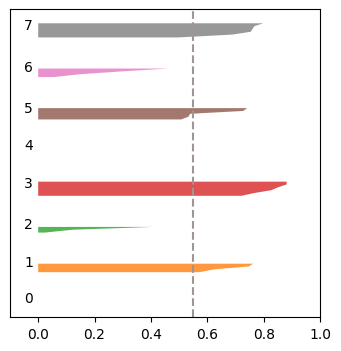

f:\Michal\Dokumenty\Studia\machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 9 : 0.5507026430365658


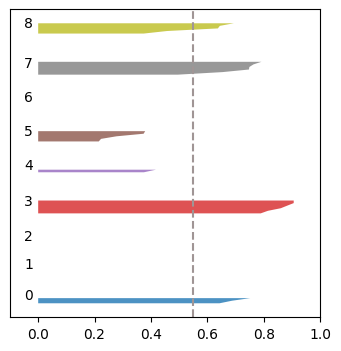

In [39]:
from sklearn.metrics import silhouette_score,silhouette_samples

for i in range(2,10):
    kmeans = KMeans(i, init='random')
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    sil = silhouette_score(X,y_pred)
    print(f"k = {i} : {sil}")

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(4, 4)
    yLow = 10
    sil_samples = silhouette_samples(X, y_pred)
    for n in range(i):
        cluster = sil_samples[y_pred == n]
        cluster.sort()
        size = cluster.shape[0]
        y_upper = yLow + size

        ax.fill_betweenx(
            np.arange(yLow, y_upper), 0, cluster, alpha=0.8,
        )
        ax.text(-0.05, yLow + 0.5 * size, str(n))
        yLow = y_upper + 10
    plt.axvline(sil, color="#a09595", linestyle = '--')
    plt.yticks([])
    plt.xlim([-0.1, 1])
    plt.show()

f:\Michal\Dokumenty\Studia\machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


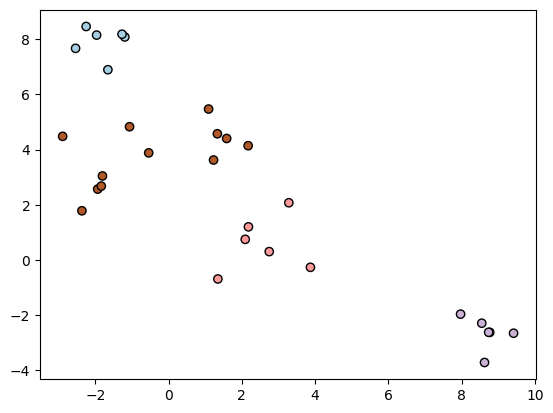

In [40]:
kmeans = KMeans(4, init='random')
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c = y_pred, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

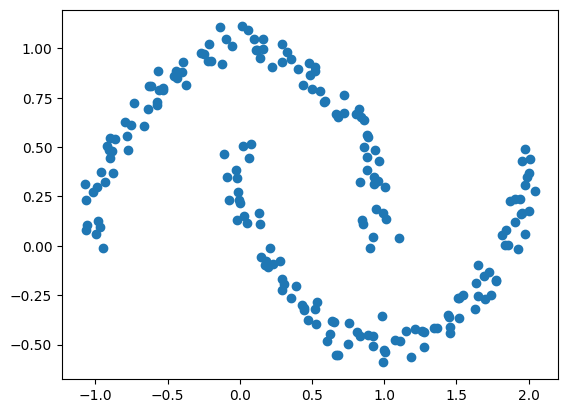

In [41]:
from sklearn.datasets import make_blobs, make_moons, make_circles

x, y = make_moons(n_samples=200, noise=.05, random_state=564)
plt.scatter(x[:,0], x[:,1])
plt.show()

f:\Michal\Dokumenty\Studia\machine_learning\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'DBSCAN')

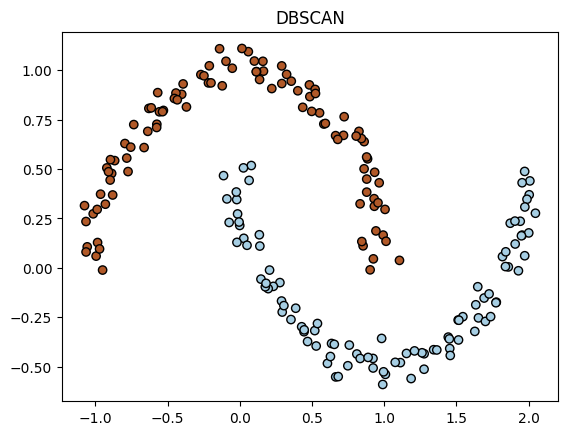

In [47]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3)
dbscan.fit(x)

kmeans = KMeans(2, init='random')
kmeans.fit(x)
y_pred2 = kmeans.predict(x)

y_pred = dbscan.fit_predict(x)


plt.scatter(x[:,0],x[:,1], c = y_pred, edgecolors='k', cmap=plt.cm.Paired)
plt.title("DBSCAN")

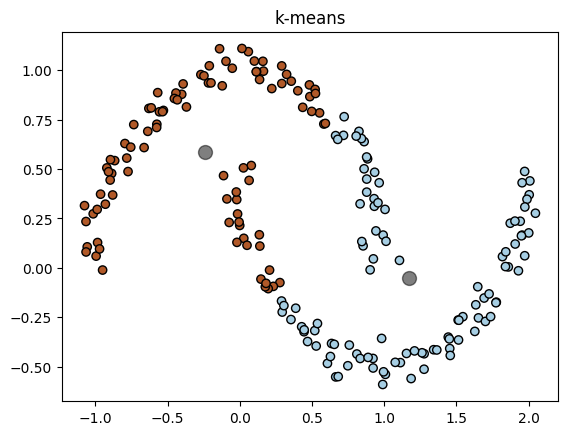

In [49]:
centers = kmeans.cluster_centers_

plt.scatter(x[:,0],x[:,1], c = y_pred2, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.title("k-means")
plt.show()